The **Lorenz System** is a set of three autonomous ordinary differential equations derived by mathematician and meteorologist **Edward Lorenz** while studying atmospheric convection. It is known to be the first model to simulate *chaos*, meaning that small changes to a dynamical system can cause drastic changes.

The Lorenz equations are given by:

$$
\begin{aligned}
\dot{x} &= \sigma (y - x), \\
\dot{y} &= x(\rho - z) - y, \\
\dot{z} &= xy - \beta z.
\end{aligned}
$$

where $\sigma$ is the **Prandtl number**, $\rho$ is the **Rayleigh number**, and $\beta$ is a dimensionless constant related to the fluid layer itself.

The Lorenz system is known to be a *dissipative system*, meaning that the energy in the system is non-conservative. In physical terms, it is **non-Hamiltonian**, which implies that the volume of the system in its *phase space* will contract under flows of energy. For certain parameter values, the system settles into a looping pattern known as the Lorenz attractor, which is often said to resemble a butterfly. 

Below is an example of a particle moving along the trajectory of the Lorenz system.


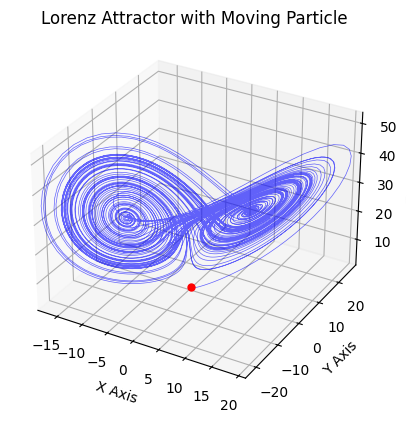

In [4]:
# %pip install numpy scipy matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the Lorenz system
def lorenz(xyz, *, s=10, r=28, b=2.667):
    x, y, z = xyz
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z
    return np.array([x_dot, y_dot, z_dot])

# Time parameters
dt = 0.01
num_steps = 10000

# Initialize storage and starting point
xyzs = np.empty((num_steps + 1, 3))
xyzs[0] = (0., 1., 1.05)

# Integrate the system using Euler's method
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Set up the figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the Lorenz attractor trajectory
ax.plot(*xyzs.T, lw=0.5, color='blue', alpha=0.6)

# Create a point that will move along the path
(point,) = ax.plot([xyzs[0, 0]], [xyzs[0, 1]], [xyzs[0, 2]],
                   marker='o', color='red', markersize=5)

# Labels and title
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor with Moving Particle")

# Set nice view limits
ax.set_xlim(np.min(xyzs[:, 0]), np.max(xyzs[:, 0]))
ax.set_ylim(np.min(xyzs[:, 1]), np.max(xyzs[:, 1]))
ax.set_zlim(np.min(xyzs[:, 2]), np.max(xyzs[:, 2]))

# Animation update function
def update(i):
    point.set_data(np.array([xyzs[i, 0]]), np.array([xyzs[i, 1]]))
    point.set_3d_properties(xyzs[i, 2])
    return (point,)

# Animate the moving particle
ani = FuncAnimation(fig, update, frames=num_steps, interval=10, blit=True)

plt.show()
